## 2.1 Binary Variables
**Bernoulli Distribution:** is used to model such binary outcomes. The probability mass function (PMF) of a Bernoulli random variable $X$ is given by:

$$Bern(X = x|p) = p^x (1 - p)^{1 - x}$$

where \( p \) is the probability of success (i.e., \( X = 1 \)), and \( x \) can be either 0 or 1.

Mean and Variance:
\begin{align*}
& E[X] = p \\
&  Var(X) = p(1 - p)
\end{align*}

With a dataset $D = \{x_1, x_2, \ldots, x_N\}$ consisting of \( N \) independent observations of a binary variable, the likelihood function for the parameter $p$ is;

$$L(p|D) = \prod_{i=1}^{N} P(X = x_i|p) = \prod_{i=1}^{N} p^{x_i} (1 - p)^{1 - x_i}
$$


The log-likelihood function is:

$$
\ell(p|D) = \sum_{i=1}^{N} \left(x_i \log p + (1 - x_i) \log (1 - p)\right)
$$

**Binomial Distribution:** is used to model the number of successes in a fixed number of independent Bernoulli trials. The PMF of a Binomial random variable $Y$ representing the number of successes in $n$ trials is given by:
\begin{align*}
Bin(Y = k|n, p) = \binom{n}{k} p^k (1 - p)^{n - k}
\end{align*}

Mean and Variance:
\begin{align*}
&  E[Y] = np \\
&  Var(Y) = np(1 - p)
\end{align*}


# 2.1.1 The Beta Distribution
We consider the Beta distribution as a conjugate prior for the Bernoulli and Binomial distributions. This prior is proportional to the powers of $p$ and $(1 - p)$:
\begin{align*}
Beta(p|a, b) = \frac{\Gamma(a + b)}{\Gamma(a) \Gamma(b)} p^{a - 1} (1 - p)^{b - 1}
\end{align*}

The Gamma function ensures proper normalization of the distribution:
\begin{align*}
\int_0^1 Beta(p|a, b) dp = 1
\end{align*}

Mean and Variance:
\begin{align*}
& E[p] = \frac{a}{a + b} \\
& Var(p) = \frac{ab}{(a + b)^2 (a + b + 1)}
\end{align*}

Abstract: Beta distribution models the uncertainty about the parameter $ p $ in Bernoulli and Binomial distributions. As the conjugate prior for these distributions, its parameters $\alpha$ and $\beta$ can be interpreted as prior counts of successes and failures, respectively.

Note: as $a \to \infty$ and $b \to \infty$, the variance of the Beta distribution approaches zero. Our certainty about the true value of $p$ increases.


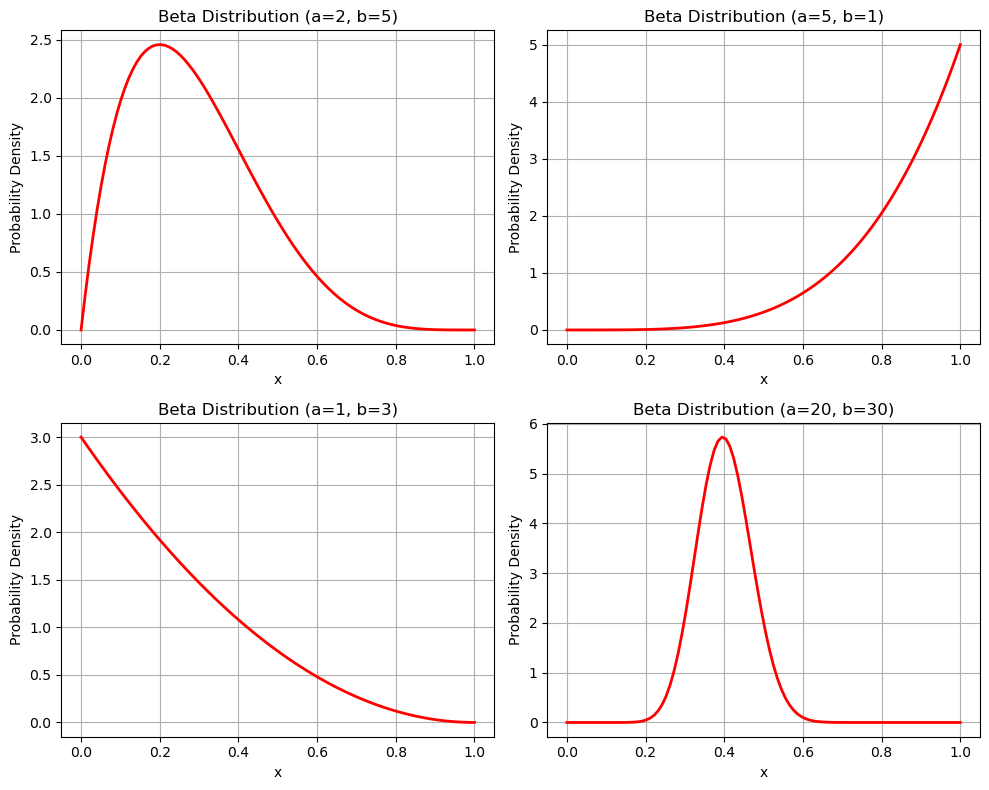

In [3]:
#beta distribution
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

def plot_beta_distribution(a, b):
    x = np.linspace(0, 1, 100)
    y = beta.pdf(x, a, b)
    plt.plot(x, y, 'r-', lw=2, label='beta pdf')
    plt.title('Beta Distribution (a={}, b={})'.format(a, b))
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid()
    plt.show()
    
params = [(2, 5), (5, 1), (1, 3), (20, 30)]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for ax, (a, b) in zip(axs.flatten(), params):
    x = np.linspace(0, 1, 100)
    y = beta.pdf(x, a, b)
    ax.plot(x, y, 'r-', lw=2)
    ax.set_title('Beta Distribution (a={}, b={})'.format(a, b))
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')
    ax.grid()
plt.tight_layout()
plt.show()



# 2.2 Multinomial Variables

Abstract: Variables can take from $K > 2$ discrete values, presented as a vector:
\begin{align*}
\mathbf{x} = (x_1, x_2, \ldots, x_K)^T
\end{align*}
where only one element is 1, and all others are 0. Suppose that the probabilities of $x_k = 1$ are given by $\mu_k$ and $\sum_{k=1}^{K} \mu_k = 1$. The distribution over $\mathbf{x}$ is given by the multinomial distribution:
\begin{align*}
Mult(\mathbf{x}|\boldsymbol{\mu}) = \prod_{k=1}^{K} \mu_k^{x_k}
\end{align*}

Some properties:
- Mean: $E[\mathbf{x}] = \boldsymbol{\mu}$
- Covariance: $Cov[\mathbf{x}] = diag(\boldsymbol{\mu}) - \boldsymbol{\mu} \boldsymbol{\mu}^T$
- Conjugate prior: Dirichlet distribution
- Likelihood for a dataset D of $N$ independent observations: $P(D|\boldsymbol{\mu}) = \prod_{k=1}^{K} \mu_k^{m_k}$, where $m_k$ is the count of observations in category $k$.
- Maximum likelihood solution: $\mu_k = \frac{m_k}{N}$
- Joint distribution for $N$ independent observations: $Mult(\mathbf{m}|\boldsymbol{\mu}, N) = \frac{N!}{\prod_{k=1}^{K} m_k!} \prod_{k=1}^{K} \mu_k^{m_k}$

# 2.2.1 The Dirichlet Distribution
The conjugate prior for the multinomial distribution has the form of:
\begin{align*}
p(\mu | \boldsymbol{\alpha}) \propto \prod_{k=1}^{K} \mu_k^{\alpha_k - 1}
\end{align*}

The normalized form of this distribution gives the Dirichlet distribution:
\begin{align*}
Dir(\boldsymbol{\mu} | \boldsymbol{\alpha}) = \frac{\Gamma(\sum_{k=1}^{K} \alpha_k)}{\prod_{k=1}^{K} \Gamma(\alpha_k)} \prod_{k=1}^{K} \mu_k^{\alpha_k - 1}
\end{align*}

Properties:
- Simplex constraint: $\sum_{k=1}^{K} \mu_k = 1$. This means that the Dirichlet distribution is confined to a $(K-1)$-dimensional simplex in $K$-dimensional space.
- Mean: $E[\mu_k] = \frac{\alpha_k}{\sum_{j=1}^{K} \alpha_j}$
- Variance: $Var[\mu_k] = \frac{\alpha_k (\sum_{j=1}^{K} \alpha_j - \alpha_k)}{(\sum_{j=1}^{K} \alpha_j)^2 (\sum_{j=1}^{K} \alpha_j + 1)}$

# 2.3 Gaussian Distribution

In case of single variable $x \in \mathbb{R}$, the Gaussian distribution is defined as:
\begin{align*}
\mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
\end{align*}

In case of multiple variables $\mathbf{x} \in \mathbb{R}^D$, the multivariate Gaussian distribution is defined as:
\begin{align*}
\mathcal{N}(\mathbf{x}|\boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{(2 \pi)^{D/2} |\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right)
\end{align*}

where $\boldsymbol{\mu}$ is the mean vector and $\boldsymbol{\Sigma}$ is the covariance matrix.

The central limit theorem: states that the sum of a large number of independent random variables, regardless of their individual distributions, tends to follow a Gaussian distribution. 







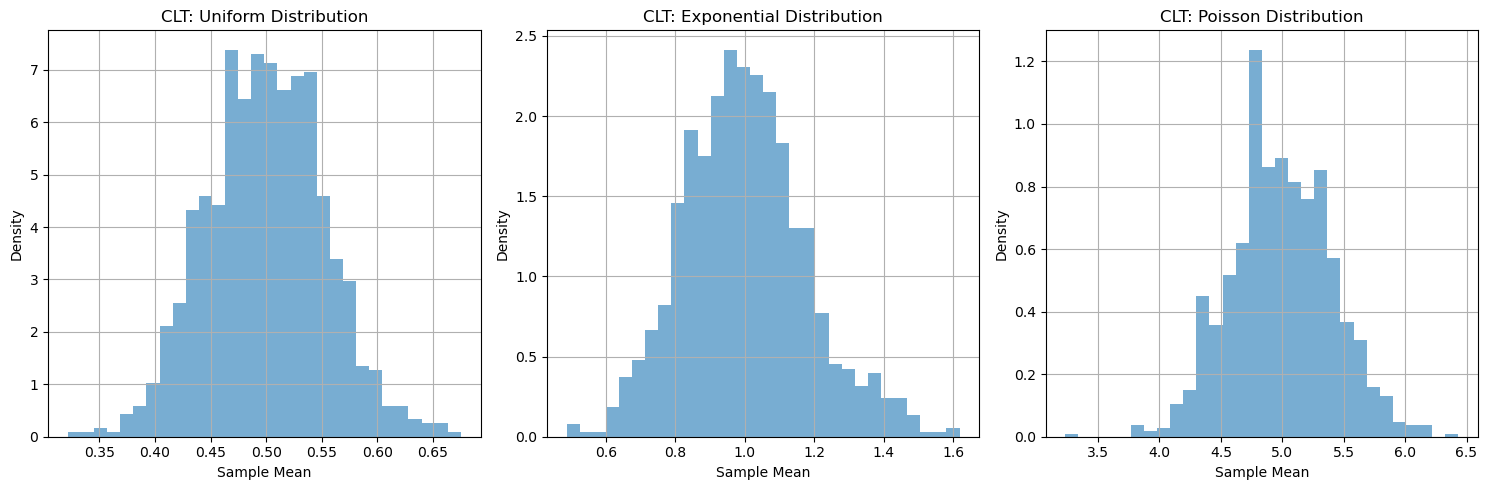

In [5]:

#central limit theorem with different distributions
import numpy as np
import matplotlib.pyplot as plt
def plot_clt_different_distributions(num_samples, num_experiments):
    distributions = {
        'Uniform': lambda n: np.random.uniform(0, 1, n),
        'Exponential': lambda n: np.random.exponential(1, n),
        'Poisson': lambda n: np.random.poisson(5, n)
    }
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    for ax, (name, dist_func) in zip(axs, distributions.items()):
        means = []
        for _ in range(num_experiments):
            samples = dist_func(num_samples)
            means.append(np.mean(samples))
        ax.hist(means, bins=30, density=True, alpha=0.6)
        ax.set_title('CLT: {} Distribution'.format(name))
        ax.set_xlabel('Sample Mean')
        ax.set_ylabel('Density')
        ax.grid()
    
    plt.tight_layout()
    plt.show()

plot_clt_different_distributions(num_samples=30, num_experiments=1000)

The Mahalanobis distance: is a measure of the distance between a point and a distribution. It is defined as:
\begin{align*}
\Delta(\mathbf{x})^2 = {(\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})}
\end{align*}

We can express the Gaussian distribution in terms of the Mahalanobis distance: $\mathcal{N}(\mathbf{x}|\boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{(2 \pi)^{D/2} |\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2} \Delta(\mathbf{x})^2\right)$

Moreover, the covariance matrix $\boldsymbol{\Sigma}$ can be expressed in terms of its eigenvalues and eigenvectors:
\begin{align*}
\boldsymbol{\Sigma} = \sum_{i=1}^{D} \lambda_i \mathbf{u}_i \mathbf{u}_i^T
\end{align*}
where $\lambda_i$ are the eigenvalues and $\mathbf{u}_i$ are the corresponding eigenvectors of $\boldsymbol{\Sigma}$.
Then, the Mahalanobis distance can be rewritten as: $\Delta(\mathbf{x})^2 = \sum_{i=1}^{D} \frac{y_i^2}{\lambda_i}$, where $y_i = \mathbf{u}_i^T (\mathbf{x} - \boldsymbol{\mu})$ are the projections of the centered data point onto the eigenvectors.

The Jacobian matrix from $\mathbf{x}$ to $\mathbf{y}$ is given by: $J = [\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_D]$. So its determinant is equal to 1, since the eigenvectors are orthonormal. 

Also, the determinant of the covariance matrix $\boldsymbol{\Sigma}$ can be expressed in terms of its eigenvalues: $|\boldsymbol{\Sigma}| = \prod_{i=1}^{D} \lambda_i$.

Thus in $\mathbf{y}$ space, the Gaussian distribution can be expressed as:
\begin{align*}
p(\mathbf{y}) &= \frac{1}{(2 \pi)^{D/2} |\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2} \sum_{i=1}^{D} \frac{y_i^2}{\lambda_i}\right) \\
&= \frac{1}{(2 \pi)^{D/2} \left(\prod_{i=1}^{D} \lambda_i\right)^{1/2}} \exp\left(-\frac{1}{2} \sum_{i=1}^{D} \frac{y_i^2}{\lambda_i}\right)
\end{align*}

which is the product of $D$ univariate Gaussian distributions. 

- Normalization: $\int \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}, \boldsymbol{\Sigma}) d\mathbf{x} = 1$
- First moment: $E[\mathbf{x}] = \boldsymbol{\mu}$
- Second moment: $E[\mathbf{x} \mathbf{x}^T] = \boldsymbol{\Sigma} + \boldsymbol{\mu} \boldsymbol{\mu}^T$
- Covariance: $Cov[\mathbf{x}] = \boldsymbol{\Sigma}$

To reduce computational complexity, we can restrict the covariance matrix to be diagonal, i.e., $\boldsymbol{\Sigma} = diag(\sigma_1^2, \sigma_2^2, \ldots, \sigma_D^2)$ or to be proportional to the identity matrix, i.e., $\boldsymbol{\Sigma} = \sigma^2 \mathbf{I}$. But this limit the capability of the model to capture correlations.



# 2.3.1 Conditional Gaussian distributions

Suppose that a random vector $\mathbf{x}$ is partitioned into two components $\mathbf{x}_a$ and $\mathbf{x}_b$: $\mathbf{x} = \begin{pmatrix} \mathbf{x}_a \\ \mathbf{x}_b \end{pmatrix}$, with corresponding mean vector, covariance matrix and precision matrix partitioned as:
\begin{align*}
\boldsymbol{\mu} = \begin{pmatrix} \boldsymbol{\mu}_a \\ \boldsymbol{\mu}_b \end{pmatrix}, \quad \boldsymbol{\Sigma} = \begin{pmatrix} \boldsymbol{\Sigma}_{aa} & \boldsymbol{\Sigma}_{ab} \\ \boldsymbol{\Sigma}_{ba} & \boldsymbol{\Sigma}_{bb} \end{pmatrix}, \quad \boldsymbol{\Sigma}^{-1} = \begin{pmatrix} \boldsymbol{\Lambda}_{aa} & \boldsymbol{\Lambda}_{ab} \\ \boldsymbol{\Lambda}_{ba} & \boldsymbol{\Lambda}_{bb} \end{pmatrix}
\end{align*}    

The conditional distribution $p(\mathbf{x}_a | \mathbf{x}_b)$ is also Gaussian, with mean and covariance given by:
\begin{align*}
E[\mathbf{x}_a | \mathbf{x}_b] &= \boldsymbol{\mu}_a + \boldsymbol{\Sigma}_{ab} \boldsymbol{\Sigma}_{bb}^{-1} (\mathbf{x}_b - \boldsymbol{\mu}_b) \\
Cov[\mathbf{x}_a | \mathbf{x}_b] &= \boldsymbol{\Sigma}_{aa} - \boldsymbol{\Sigma}_{ab} \boldsymbol{\Sigma}_{bb}^{-1} \boldsymbol{\Sigma}_{ba}
\end{align*}

We can also express the conditional mean in terms of the precision matrix as:
\begin{align*}
E[\mathbf{x}_a | \mathbf{x}_b] &= \boldsymbol{\mu}_a - \boldsymbol{\Lambda}_{aa}^{-1} \boldsymbol{\Lambda}_{ab} (\mathbf{x}_b - \boldsymbol{\mu}_b) \\
Cov[\mathbf{x}_a | \mathbf{x}_b] &= \boldsymbol{\Lambda}_{aa}^{-1}
\end{align*}


# 2.3.2 Marginal Gaussian distributions

The marginal distribution $p(\mathbf{x}_a)$ is also Gaussian, with mean and covariance given by:
\begin{align*}
E[\mathbf{x}_a] &= \boldsymbol{\mu}_a \\
Cov[\mathbf{x}_a] &= \boldsymbol{\Sigma}_{aa}
\end{align*}
Or we can express as: $p(\mathbf{x}_a) = \mathcal{N}(\mathbf{x}_a | \boldsymbol{\mu}_a, \boldsymbol{\Sigma}_{aa})$.

# 2.3.3 Bayes's Theorem for Gaussian variables

Given a marginal Gaussian distribution for $\mathbf{x}$ and conditional Gaussian distribution for $\mathbf{y}$ given $\mathbf{x}$:
\begin{align*}
p(\mathbf{x}) &= \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Lambda}^{-1}) \\
p(\mathbf{y} | \mathbf{x}) &= \mathcal{N}(\mathbf{y} | \mathbf{A} \mathbf{x} + \mathbf{b}, \mathbf{L}^{-1})
\end{align*}

the marginal distribution of $\mathbf{y}$ and the conditional distribution $p(\mathbf{x} | \mathbf{y})$:

\begin{align*}
p(\mathbf{y}) &= \mathcal{N}(\mathbf{y} | \mathbf{A} \boldsymbol{\mu} + \mathbf{b}, \mathbf{L}^{-1} + \mathbf{A} \boldsymbol{\Lambda}^{-1} \mathbf{A}^T) \\
p(\mathbf{x} | \mathbf{y}) &= \mathcal{N}(\mathbf{x} | \boldsymbol{\Sigma} \times (\mathbf{A}^T \mathbf{L} (\mathbf{y} - \mathbf{b}) + \boldsymbol{\Lambda} \boldsymbol{\mu}), \boldsymbol{\Sigma})
\end{align*}

where $\boldsymbol{\Sigma} = (\boldsymbol{\Lambda} + \mathbf{A}^T \mathbf{L} \mathbf{A})^{-1}$.

# 2.3.4 Maximum likelihood for the Gaussian 

The log-likelihood function: $\ell(\boldsymbol{\mu}, \boldsymbol{\Sigma}|D) = -\frac{N D}{2} \log(2 \pi) - \frac{N}{2} \log |\boldsymbol{\Sigma}| - \frac{1}{2} \sum_{n=1}^{N} (\mathbf{x}_n - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}_n - \boldsymbol{\mu})$

The function only depends on $\boldsymbol{\mu}$ and $\boldsymbol{\Sigma}$. To find the maximum likelihood estimates, we take the derivatives of the log-likelihood function with respect to $\boldsymbol{\mu}$ and $\boldsymbol{\Sigma}$:
\begin{align*}
\frac{\partial \ell}{\partial \boldsymbol{\mu}} &= \boldsymbol{\Sigma}^{-1} \sum_{n=1}^{N} (\mathbf{x}_n - \boldsymbol{\mu}) \\
\frac{\partial \ell}{\partial \boldsymbol{\Sigma}} &= -\frac{N}{2} \boldsymbol{\Sigma}^{-1} + \frac{1}{2} \boldsymbol{\Sigma}^{-1} \left( \sum_{n=1}^{N} (\mathbf{x}_n - \boldsymbol{\mu})(\mathbf{x}_n - \boldsymbol{\mu})^T \right) \boldsymbol{\Sigma}^{-1}
\end{align*}
Setting these derivatives to zero gives the maximum likelihood estimates:
\begin{align*}
\boldsymbol{\mu}_{ML} &= \frac{1}{N} \sum_{n=1}^{N} \mathbf{x}_n \\
\boldsymbol{\Sigma}_{ML} &= \frac{1}{N} \sum_{n=1}^{N} (\mathbf{x}_n - \boldsymbol{\mu}_{ML})(\mathbf{x}_n - \boldsymbol{\mu}_{ML})^T
\end{align*}

The expectation of the mean and maximum likelihood estimate of the covariance matrix:
\begin{align*}
E[\boldsymbol{\mu}_{ML}] &= \boldsymbol{\mu} \\
E[\boldsymbol{\Sigma}_{ML}] &= \frac{N - 1}{N} \boldsymbol{\Sigma}
\end{align*}    

The estimator for the covariance matrix is biased, but this bias can be corrected by using:
\begin{align*}
\boldsymbol{\Sigma}_{unbiased} = \frac{1}{N - 1} \sum_{n=1}^{N} (\mathbf{x}_n - \boldsymbol{\mu}_{ML})(\mathbf{x}_n - \boldsymbol{\mu}_{ML})^T
\end{align*}

# 2.3.5 Sequential estimation

If we dissect the maximum likelihood estimate of the mean into two parts: one based on the first $N$ data points, and the other based on the $(N+1)$-th data point, we have:
\begin{align*}
\boldsymbol{\mu}_{ML}^{(N+1)} &= \boldsymbol{\mu}_{ML}^{(N)} + \frac{1}{N + 1} (\mathbf{x}_{N+1} - \boldsymbol{\mu}_{ML}^{(N)})
\end{align*}

This equation shows that the new estimate of the mean can be obtained by adjusting the previous estimate with a fraction of the difference between the new data point and the previous estimate. 

    Robbins-Monro algorithm: 
Consider a pair of random variables $\theta$ and $z$ governed by a joint distribution $p(\theta, z)$. Define a function:
\begin{align*}
f(\theta) = E[z| \theta] = \int z \, p(z | \theta) \, dz
\end{align*}

Our goal is to find the root $\theta^*$ of the equation $f(\theta) = 0$. We suppose that we observes values of $z$ one at a time and use these observations to update our estimate of $\theta$ sequentially. We shall assume that conditional variance of $z$ given $\theta$ is finite:
\begin{align*}
E[(z - f(\theta))^2 | \theta] &< \infty
\end{align*}

The Robbins-Monro update rule is given by:
\begin{align*}
\theta^{(n+1)} = \theta^(n) - a_n z(\theta^(n))
\end{align*}

where $z(\theta^(n))$ is the observed value of $z$ when $\theta = \theta^(n)$, and $a_n$ is a sequence of positive step sizes that satisfy the conditions:
\begin{align*}
&\lim_{n \to \infty} a_n = 0 \\
&\sum_{n=1}^{\infty} a_n = \infty \\
&\sum_{n=1}^{\infty} a_n^2 < \infty
\end{align*}

We know apply the Robbins-Monro algorithm to solve a general maximum likelihood problem. By definition, the maximum likelihood estimate $\theta_{ML}$ is a stationary point of the log-likelihood function:
\begin{align*}
\frac{\partial}{\partial \theta} \left \{ \frac{1}{N} \sum_{n=1}^{N} \log p(x_n | \theta) \right\} = 0
\end{align*}

Exchanging the order of differentiation and summation and taking the limit as $N \to \infty$, we have:
\begin{align*}
\lim_{N \to \infty} \frac{1}{N} \sum_{n=1}^{N} \frac{\partial}{\partial \theta} \log p(x_n | \theta) = E\left[ \frac{\partial}{\partial \theta} \log p(x | \theta) \right] 
\end{align*}

So that we can apply the Robbins-Monro algorithm:
\begin{align*}
\theta^{(N+1)} = \theta^{(N)} + a_N \frac{\partial}{\partial \theta} \log p(x_N | \theta^{(N)})
\end{align*}

As we consider the case of estimating the mean of a Gaussian distribution with known variance $\sigma^2$, the log-likelihood function for a single data point $x$ is given by:
\begin{align*}
\log p(x | \mu) = -\frac{1}{2} \log(2 \pi \sigma^2) - \frac{(x - \mu)^2}{2 \sigma^2}
\end{align*}
Taking the derivative with respect to $\mu$, we have:
\begin{align*}
\frac{\partial}{\partial \mu} \log p(x | \mu) = \frac{x - \mu}{\sigma^2}
\end{align*}    
Thus, the Robbins-Monro update rule for estimating the mean becomes:
\begin{align*}
\mu^{(N+1)} = \mu^{(N)} + a_N \frac{x_N - \mu^{(N)}}{\sigma^2}
\end{align*}

where $a_N$ is the step size at iteration $N$. By choosing $a_N = \frac{\sigma^2}{N + 1}$, we recover the sequential update formula for the mean:
\begin{align*}
\mu^{(N+1)} = \mu^{(N)} + \frac{1}{N + 1} (x_N - \mu^{(N)})
\end{align*}

# 2.3.6 Bayesian inference for the Gaussian

We have known the likelihood function for a dataset $D = \{x_1, x_2, \ldots, x_N\}$ given the mean $\mu$ and variance $\sigma^2$:
\begin{align*}
p(D | \mu, \sigma^2) = \prod_{n=1}^{N} \mathcal{N}(x_n | \mu, \sigma^2) = \frac{1}{(2 \pi \sigma^2)^{N/2}} \exp\left(-\frac{1}{2 \sigma^2} \sum_{n=1}^{N} (x_n - \mu)^2\right)
\end{align*}

**Known variance, unknown mean:** We choose the prior to be a Gaussian distribution so that the posterior will also be a product of two exponentials of quadratic functions in $\mu$ and hence will also be Gaussian.
\begin{align*}
p(\mu) = \mathcal{N}(\mu | \mu_0, \sigma_0^2) 
\end{align*}

The posterior distribution for $\mu:$
\begin{align*}
p(\mu | D) \propto p(D | \mu) p(\mu)
\end{align*}

We can show that the posterior distribution is given by:
\begin{align*}
p(\mu | D) = \mathcal{N}(\mu | \mu_N, \sigma_N^2)
\end{align*}
where
\begin{align*}
\sigma_N^2 &= \left( \frac{N}{\sigma^2} + \frac{1}{\sigma_0^2} \right)^{-1} \\
\mu_N &= \frac{\sigma^2}{N\sigma_0^2 + \sigma^2} \mu_0 + \frac{N \sigma_0^2}{N \sigma_0^2 + \sigma^2} \mu_{ML}
\end{align*}

Note:
- If $N = 0$, then $\mu_N = \mu_0$ and $\sigma_N^2 = \sigma_0^2$, so the posterior reduces to the prior.
- As $N \to \infty$, $\mu_N$ approaches the maximum likelihood estimate $\mu_{ML}$.
- The precision is additive: $\frac{1}{\sigma_N^2} = \frac{N}{\sigma^2} + \frac{1}{\sigma_0^2}$. It means that with more data, the precision is steadily increased, leading to a decrease in the variance of the posterior distribution.


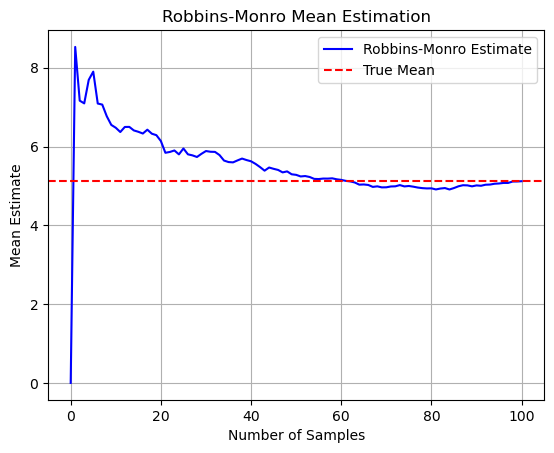

In [3]:
#illustrate Robbins-Monro algorithm

import numpy as np
import matplotlib.pyplot as plt

def robbins_monro_mean_estimation(data, initial_mean=0.0):
    mean_estimate = initial_mean
    estimates = [mean_estimate]
    
    for n, x in enumerate(data, start=1):
        learning_rate = 1 / n
        mean_estimate += learning_rate * (x - mean_estimate)
        estimates.append(mean_estimate)
    
    return estimates

def plot_robbins_monro(data, estimates):
    plt.plot(range(len(estimates)), estimates, label='Robbins-Monro Estimate', color='blue')
    plt.axhline(y=np.mean(data), color='red', linestyle='--', label='True Mean')
    plt.title('Robbins-Monro Mean Estimation')
    plt.xlabel('Number of Samples')
    plt.ylabel('Mean Estimate')
    plt.legend()
    plt.grid()
    plt.show()
    
np.random.seed(0)
data = np.random.normal(loc=5.0, scale=2.0, size=100)
estimates = robbins_monro_mean_estimation(data)
plot_robbins_monro(data, estimates)




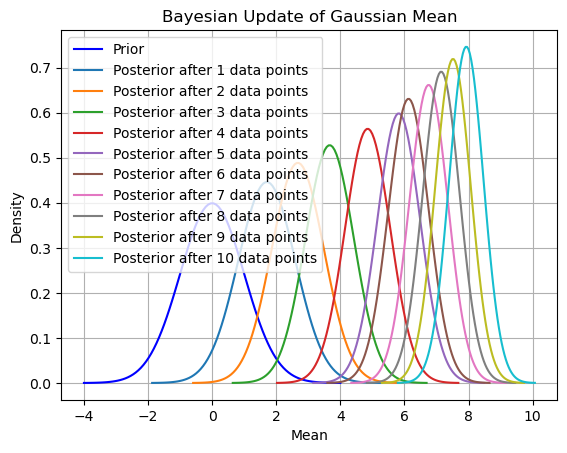

In [6]:
# Bayesian inference for Gaussian mean with known variance

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def bayesian_gaussian_mean_known_variance(prior_mean, prior_variance, known_variance, data):
    posterior_mean = prior_mean
    posterior_variance = prior_variance
    
    for x in data:
        posterior_variance = 1 / (1 / posterior_variance + 1 / known_variance)
        posterior_mean = posterior_variance * (posterior_mean / posterior_variance + x / known_variance)
    
    return posterior_mean, posterior_variance

def plot_bayesian_update(prior_mean, prior_variance, known_variance, data):
    posterior_mean = prior_mean
    posterior_variance = prior_variance
    
    x = np.linspace(prior_mean - 4*np.sqrt(prior_variance), prior_mean + 4*np.sqrt(prior_variance), 100)
    plt.plot(x, norm.pdf(x, prior_mean, np.sqrt(prior_variance)), label='Prior', color='blue')
    
    for i, x_i in enumerate(data):
        posterior_variance = 1 / (1 / posterior_variance + 1 / known_variance)
        posterior_mean = posterior_variance * (posterior_mean / posterior_variance + x_i / known_variance)
        
        x = np.linspace(posterior_mean - 4*np.sqrt(posterior_variance), posterior_mean + 4*np.sqrt(posterior_variance), 100)
        plt.plot(x, norm.pdf(x, posterior_mean, np.sqrt(posterior_variance)), label='Posterior after {} data points'.format(i+1))
    
    plt.title('Bayesian Update of Gaussian Mean')
    plt.xlabel('Mean')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()
    
np.random.seed(0)
data = np.random.normal(loc=5.0, scale=2.0, size=10)
prior_mean = 0.0
prior_variance = 1.0
known_variance = 4.0
plot_bayesian_update(prior_mean, prior_variance, known_variance, data)

We can also view the Bayesian update as a sequential process. We can write the posterior distribution separating the final data point $x_N$ from the rest of the dataset $D_{N-1} = \{x_1, x_2, \ldots, x_{N-1}\}$:
\begin{align*}
p(\mu | D) \propto \left[p(\mu) \prod_{n=1}^{N-1} p(x_n | \mu) \right] p(x_N | \mu)  
\end{align*}

We can view the term in square brackets as a prior distribution for $\mu$ based on the first $N-1$ data points. Then, combining this with the likelihood for the final data point $x_N$, we obtain the posterior distribution for $\mu$ after observing all $N$ data points.

**Known mean, unknown variance:** Now, we suppose the mean is known, and we want to infer the variance $\sigma^2$. It is convenient to work with the precision $\lambda = 1/\sigma^2$. The likelihood function for the dataset $D$ given the precision $\lambda$ is:
\begin{align*}
p(D | \lambda) = \left( \frac{\lambda}{2 \pi} \right)^{N/2} \exp\left(-\frac{\lambda}{2} \sum_{n=1}^{N} (x_n - \mu)^2\right)
\end{align*}

We choose the conjugate prior for the precision $\lambda$ to be a Gamma distribution:
\begin{align*}
p(\lambda) = Gam(\lambda | a, b) = \frac{b^a}{\Gamma(a)} \lambda^{a - 1} \exp(-b \lambda)
\end{align*}

The mean and variance of the Gamma distribution are given by:
\begin{align*}
E[\lambda] = \frac{a}{b}, \quad Var[\lambda] = \frac{a}{b^2}
\end{align*}

With a prior $Gam(\lambda | a_0, b_0)$, the posterior can be obtained as:
\begin{align*}
p(\lambda | \mathbf{X}) \propto \lambda^{a_0-1} \lambda^{N/2} \exp\left(-\lambda b_0 - \frac{\lambda}{2} \sum_{n=1}^{N} (x_n - \mu)^2\right)
\end{align*}

which we recognize as a Gamma distribution $Gam(\lambda | a_N, b_N)$ with updated parameters:
\begin{align*}
a_N &= a_0 + \frac{N}{2} \\
b_N &= b_0 + \frac{1}{2} \sum_{n=1}^{N} (x_n - \mu)^2
\end{align*}

Instead of working with the precision $\lambda$, we can also work with the variance $\sigma^2$. The conjugate prior for the variance is given by the inverse Gamma distribution:
\begin{align*}
p(\sigma^2) = IG(\sigma^2 | a, b) = \frac{b^a}{\Gamma(a)} (\sigma^2)^{-a - 1} \exp\left(-\frac{b}{\sigma^2}\right)
\end{align*}
The mean and variance of the inverse Gamma distribution are given by:
\begin{align*}
E[\sigma^2] = \frac{b}{a - 1}, \quad Var[\sigma^2] = \frac{b^2}{(a - 1)^2 (a - 2)}
\end{align*}

With a prior $IG(\sigma^2 | a_0, b_0)$, the posterior can be obtained as:
\begin{align*}
p(\sigma^2 | \mathbf{X}) \propto (\sigma^2)^{-a_0 - 1} (\sigma^2)^{-N/2} \exp\left(-\frac{b_0}{\sigma^2} - \frac{1}{2 \sigma^2} \sum_{n=1}^{N} (x_n - \mu)^2\right)
\end{align*}

which we recognize as an inverse Gamma distribution $IG(\sigma^2 | a_N, b_N)$ with updated parameters:
\begin{align*}
a_N &= a_0 + \frac{N}{2} \\
b_N &= b_0 + \frac{1}{2} \sum_{n=1}^{N} (x_n - \mu)^2
\end{align*}

Note that the updated parameters for both the Gamma and inverse Gamma distributions are the same. The parameter $a$ is incremented by $N/2$, reflecting the addition of $N$ data points, while the parameter $b$ accumulates the sum of squared deviations from the mean, scaled by $1/2$. So that the prior parameters $a_0$ and $b_0$ can be interpreted as representing prior observations equivalent to $2 a_0$ data points with a total sum of squared deviations equal to $2 b_0$.

**Unknown mean and variance:** When both the mean $\mu$ and variance $\sigma^2$ are unknown, we consider the dependence of the likelihood function on $\mu$ and $\lambda = 1/\sigma^2$:
\begin{align*}
p(D | \mu, \lambda) &= \left( \frac{\lambda}{2 \pi} \right)^{N/2} \exp\left(-\frac{\lambda}{2} \sum_{n=1}^{N} (x_n - \mu)^2\right)\\
& \propto \left[ \lambda^{1/2} \exp\left(-\frac{\lambda \mu^2}{2}\right) \right]^N \times \exp\left(\lambda \mu \sum_{n=1}^{N} x_n - \frac{\lambda}{2} \sum_{n=1}^{N} x_n^2\right)
\end{align*}

We wish to choose a conjugate prior for the pair $(\mu, \lambda)$:
\begin{align*}
p(\mu, \lambda) &\propto \left[ \lambda^{1/2}exp\left(-\frac{\lambda \mu^2}{2}\right) \right]^{\beta} \times \exp\left(\lambda \mu c - \frac{\lambda}{2} d\right)\\
&= \lambda^{\beta/2} \exp\left(-\frac{\beta \lambda}{2} (\mu - \frac{c}{\beta})^2\right) \times \exp\left(-\frac{\lambda}{2} (d - \frac{c^2}{\beta})\right)
\end{align*}

We recognize this as the product of a Gaussian distribution for $\mu$ given $\lambda$ and a Gamma distribution for $\lambda$:
\begin{align*}
p(\mu, \lambda) &= \mathcal{N}(\mu | \mu_0, (\beta \lambda)^{-1}) \times Gam(\lambda | a, b)
\end{align*}

where
\begin{align*}
\mu_0 &= \frac{c}{\beta} \\
a &= \frac{\beta}{2} + 1 \\
b &= \frac{1}{2} \left( d - \frac{c^2}{\beta} \right)
\end{align*}

This prior is known as the normal-Gamma distribution.

**Multivariate case:** In the case of multivariate Gaussian distribution with unknown mean vector $\boldsymbol{\mu}$ and known precision matrix $\boldsymbol{\Lambda}$, we choose the prior for $\boldsymbol{\mu}$ to be a multivariate Gaussian distribution.

For the case of unknown mean vector $\boldsymbol{\mu}$ and unknown precision matrix $\boldsymbol{\Lambda}$, we choose the conjugate prior to be the normal-Wishart distribution:
\begin{align*}
p(\boldsymbol{\mu}, \boldsymbol{\Lambda}) = \mathcal{N}(\boldsymbol{\mu} | \boldsymbol{\mu}_0, (\beta \boldsymbol{\Lambda})^{-1}) \times W(\boldsymbol{\Lambda} | \mathbf{W}, \nu)
\end{align*}

where $W(\boldsymbol{\Lambda} | \mathbf{W}, \nu)$ is the Wishart distribution with scale matrix $\mathbf{W}$ and degrees of freedom $\nu$. The Wishart distribution is defined as:
\begin{align*}
W(\boldsymbol{\Lambda} | \mathbf{W}, \nu) = B |\boldsymbol{\Lambda}|^{(\nu - D - 1)/2} \exp\left(-\frac{1}{2} \text{tr}(\mathbf{W}^{-1} \boldsymbol{\Lambda})\right)
\end{align*}

where $B$ is the normalization constant given by:
\begin{align*}
B = \frac{|\mathbf{W}|^{-\nu/2}}{2^{\nu D/2} \pi^{D(D-1)/4} \prod_{i=1}^{D} \Gamma\left(\frac{\nu + 1 - i}{2}\right)}
\end{align*}

If unknown mean vector $\boldsymbol{\mu}$ and unknown covariance matrix $\boldsymbol{\Sigma}$, we choose the conjugate prior to be the normal-inverse-Wishart distribution:
\begin{align*}
p(\boldsymbol{\mu}, \boldsymbol{\Sigma}) = \mathcal{N}(\boldsymbol{\mu} | \boldsymbol{\mu}_0, (\beta \boldsymbol{\Sigma})^{-1}) \times IW(\boldsymbol{\Sigma} | \mathbf{W}, \nu)
\end{align*}

where $IW(\boldsymbol{\Sigma} | \mathbf{W}, \nu)$ is the inverse-Wishart distribution with scale matrix $\mathbf{W}$ and degrees of freedom $\nu$. The inverse-Wishart distribution is defined as:
\begin{align*}
IW(\boldsymbol{\Sigma} | \mathbf{W}, \nu) = B |\boldsymbol{\Sigma}|^{-(\nu + D + 1)/2} \exp\left(-\frac{1}{2} \text{tr}(\mathbf{W} \boldsymbol{\Sigma}^{-1})\right)
\end{align*}

where $B$ is the normalization constant given by:   
\begin{align*}
B = \frac{|\mathbf{W}|^{\nu/2}}{2^{\nu D/2} \pi^{D(D-1)/4} \prod_{i=1}^{D} \Gamma\left(\frac{\nu + 1 - i}{2}\right)}
\end{align*}












# 2.3.7 Student's t-distribution

If we marginalize over the precision $\lambda$ in the Gaussian-Gamma distribution, we obtain the Student's t-distribution:
\begin{align*}
St(x | \mu, \lambda, \nu) &= \int_0^{\infty} \mathcal{N}(x | \mu, \lambda^{-1}) Gam(\lambda | a,b) d\lambda\\
&= \frac{b^a \times \Gamma\left(a + \frac{1}{2}\right)}{\Gamma(a)} \left( \frac{1}{\pi} \right)^{1/2} \left[ b + \frac{(x - \mu)^2}{2} \right]^{-\left(a + \frac{1}{2}\right)}
\end{align*}

We set new parameters:
\begin{align*}
\nu &= 2a \\
\lambda &= \frac{a}{b}
\end{align*}

So that the Student's t-distribution can be rewritten as:
\begin{align*}
St(x | \mu, \lambda, \nu) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)} \left( \frac{\lambda}{\pi \nu} \right)^{1/2} \left[ 1 + \frac{\lambda (x - \mu)^2}{\nu} \right]^{-\left(\frac{\nu + 1}{2}\right)}
\end{align*}

The parameter $\lambda$ is the precision, and the parameter $\nu$ is known as the degrees of freedom. As $\nu \to \infty$, the Student's t-distribution approaches the Gaussian distribution. For small values of $\nu$, the distribution has heavier tails than the Gaussian, making it more robust to outliers. 

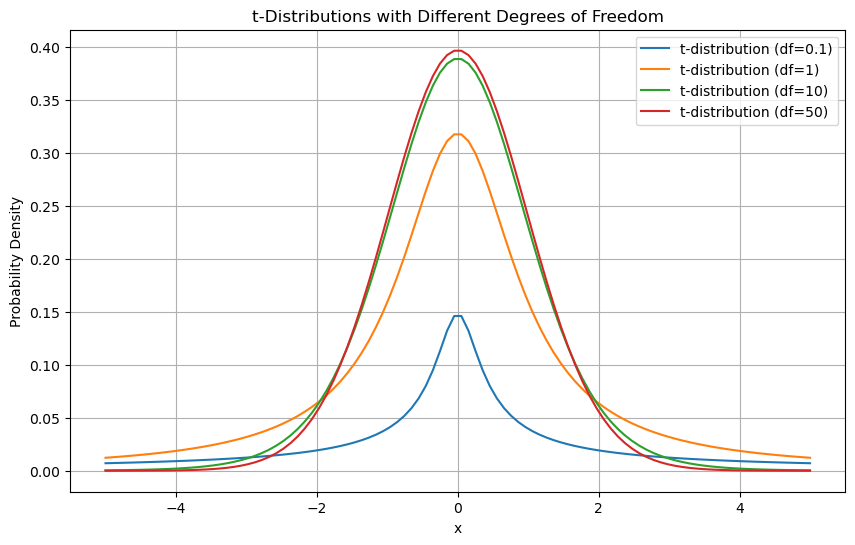

In [3]:
#different t distributions
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

def plot_t_distributions(dfs):
    x = np.linspace(-5, 5, 100)
    plt.figure(figsize=(10, 6))
    
    for df in dfs:
        y = t.pdf(x, df)
        plt.plot(x, y, label='t-distribution (df={})'.format(df))
    
    plt.title('t-Distributions with Different Degrees of Freedom')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid()
    plt.show()
    
dfs = [0.1,1, 10, 50]
plot_t_distributions(dfs)


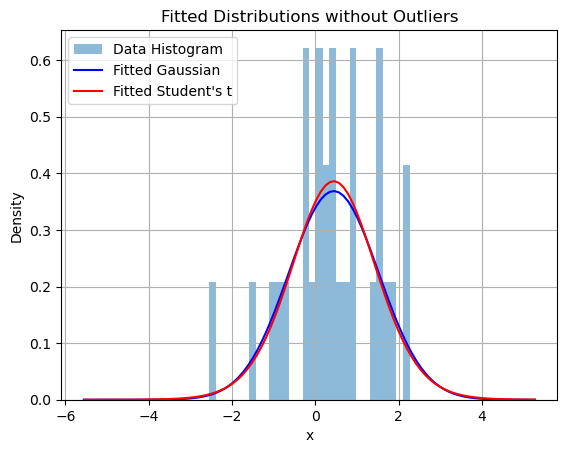

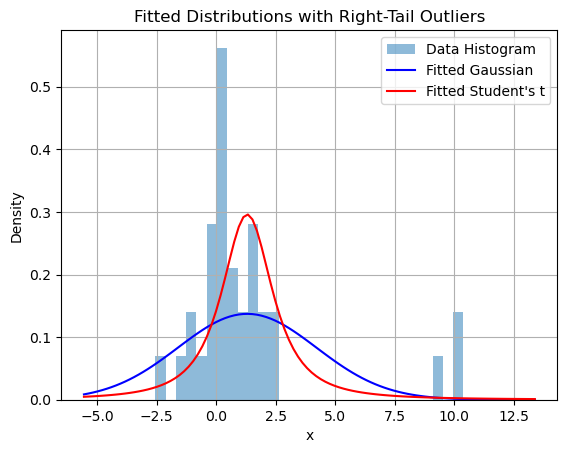

In [14]:
#compare the robustness of Gaussian and Student's t-distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

def fit_distributions_max_likelihood(data):
    gauss_mean, gauss_std = norm.fit(data)
    t_df, t_loc, t_scale = t.fit(data, floc=np.mean(data))
    return (gauss_mean, gauss_std), (t_loc, t_scale, t_df)

def plot_fitted_distributions(data, gauss_params, t_params, title='Fitted Distributions'):
    x = np.linspace(min(data)-3, max(data)+3, 100)
    y_gauss = norm.pdf(x, gauss_params[0], gauss_params[1])
    y_t = t.pdf(x, t_params[2], loc=t_params[0], scale=t_params[1])
    
    plt.hist(data, bins=30, density=True, alpha=0.5, label='Data Histogram')
    plt.plot(x, y_gauss, label='Fitted Gaussian', color='blue')
    plt.plot(x, y_t, label="Fitted Student's t", color='red')
    plt.title(title)
    plt.xlabel('x') 
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()

np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=30)
gauss_params, t_params = fit_distributions_max_likelihood(data)
plot_fitted_distributions(data, gauss_params, t_params, title='Fitted Distributions without Outliers')

# Add right-tail outliers
outliers = np.random.normal(loc=10, scale=1, size=3)
data_with_outliers = np.concatenate([data, outliers])
gauss_params_outliers, t_params_outliers = fit_distributions_max_likelihood(data_with_outliers)
plot_fitted_distributions(data_with_outliers, gauss_params_outliers, t_params_outliers, title='Fitted Distributions with Right-Tail Outliers')




The Student's t-distribution can be rewritten as:
\begin{align*}
St(x | \mu, \lambda, \nu) = \int_0^{\infty} \mathcal{N}(x | \mu, (\lambda \tau)^{-1}) Gam(\tau | \frac{\nu}{2}, \frac{\nu}{2}) d\tau
\end{align*}

We can generalize the Student's t-distribution to multivariate variables:

\begin{align*}
St(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}, \nu) = \frac{\Gamma\left(\frac{\nu + D}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)} \frac{1}{(\nu \pi)^{D/2} |\boldsymbol{\Sigma}|^{1/2}} \left[ 1 + \frac{1}{\nu} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right]^{-\left(\frac{\nu + D}{2}\right)}
\end{align*}

Recall the Mahalanobis distance: $\Delta(\mathbf{x})^2 = (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})$ and using the precision matrix $\boldsymbol{\Lambda} = \boldsymbol{\Sigma}^{-1}$, we can express the multivariate Student's t-distribution as:
\begin{align*}
St(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Lambda}, \nu) = \frac{\Gamma\left(\frac{\nu + D}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)} \frac{|\boldsymbol{\Lambda}|^{1/2}}{(\nu \pi)^{D/2}} \left[ 1 + \frac{1}{\nu} \Delta(\mathbf{x})^2 \right]^{-\left(\frac{\nu + D}{2}\right)}
\end{align*}


Properties of the multivariate Student's t-distribution:
- Mean: $E[\mathbf{x}] = \boldsymbol{\mu}$ for $\nu > 1$
- Covariance: $Cov[\mathbf{x}] = \frac{\nu}{\nu - 2} \boldsymbol{\Sigma}$ for $\nu > 2$
- As $\nu \to \infty$, $St(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}, \nu) \to \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma})$
- mode: $\boldsymbol{\mu}$

Properties of the univariate Student's t-distribution:
- Mean: $E[x] = \mu$ for $\nu > 1$
- Variance: $Var[x] = \frac{\nu}{\nu - 2} \frac{1}{\lambda}$ for $\nu > 2$
- As $\nu \to \infty$, $St(x | \mu, \lambda, \nu) \to \mathcal{N}(x | \mu, \lambda^{-1})$
- mode: $\mu$

# 2.3.8 Periodic variables

We need an appropriate distribution to model periodic variables, such as angles. We can first model a periodic variable using a variable $\\mathbf{x} \in \mathbb{R}^2$ constrained to lie on the unit circle. We can then use a bivariate Gaussian distribution, having mean vector $\boldsymbol{\mu} = \begin{pmatrix} \mu_1 \\ \mu_2 \end{pmatrix}$ and covariance matrix $\boldsymbol{\Sigma} = \sigma^2 \mathbf{I}$:
\begin{align*}
p(x_1, x_2) = \frac{1}{2 \pi \sigma^2} \exp\left(-\frac{1}{2 \sigma^2} \left[ (x_1 - \mu_1)^2 + (x_2 - \mu_2)^2 \right] \right)
\end{align*}

To express this distribution in terms of the angle $\phi = \tan^{-1}(x_2/x_1)$, we convert to polar coordinates:
\begin{align*}
x_1 &= r \cos \phi \\
x_2 &= r \sin \phi
\end{align*}

We also map the mean vector to polar coordinates:
\begin{align*}
\mu_1 &= r_0 \cos \phi_0 \\
\mu_2 &= r_0 \sin \phi_0

\end{align*}

Focus on the exponent of the Gaussian distribution and note that on the unit circle, $r = 1$:
\begin{align*}
-\frac{1}{2 \sigma^2} \left[ (x_1 - \mu_1)^2 + (x_2 - \mu_2)^2 \right] &= -\frac{1}{2 \sigma^2} = -\frac{1}{2 \sigma^2} \left[ 1 + r_0^2 - 2 r_0 (x_1 \cos \phi_0 + x_2 \sin \phi_0) \right] \\
&= -\frac{1}{2 \sigma^2} \left[ 1 + r_0^2 - 2 r_0 \cos(\phi - \phi_0) \right]\\
&= \frac{r_0}{\sigma^2} \cos(\phi - \phi_0) + \text{constant}
\end{align*}

If we define $m = \frac{r_0}{\sigma^2}$, we can express the distribution over the angle $\phi$ as:
\begin{align*}
p(\phi | \phi_0, m) = \frac{1}{2 \pi I_0(m)} \exp\left( m \cos(\phi - \phi_0) \right)
\end{align*}

This distribution is known as the von Mises distribution. The normalization constant involves the modified Bessel function of the first kind and order zero, defined as:
\begin{align*}
I_0(m) = \frac{1}{2 \pi} \int_0^{2 \pi} \exp(m \cos \phi) d\phi
\end{align*}

Properties of the von Mises distribution:
- Mean direction: $E[\phi] = \phi_0$
- Circular variance: $Var[\phi] = 1 - \frac{I_1(m)}{I_0(m)}$ where $I_1(m)$ is the modified Bessel function of the first kind and order one.
- As $m \to 0$, the von Mises distribution approaches the uniform distribution on $[0, 2\pi)$.
- As $m \to \infty$, the von Mises distribution approaches a Gaussian distribution with mean $\phi_0$ and variance $1/m$.

The log-likelihood function for a dataset $\{\phi_1, \phi_2, \ldots, \phi_N\}$ is given by:
\begin{align*}
\ell(D | \phi_0, m) = -N \log(2 \pi I_0(m)) + m \sum_{n=1}^{N} \cos(\phi_n - \phi_0)
\end{align*}

Setting the derivative of the log-likelihood with respect to $\phi_0$ to zero gives:
\begin{align*}
\frac{\partial \ell}{\partial \phi_0} = m \sum_{n=1}^{N} \sin(\phi_n - \phi_0) = 0
\end{align*}

This leads to the maximum likelihood estimate for $\phi_0$:
\begin{align*}
\phi_0 = \tan^{-1}\left( \frac{\sum_{n=1}^{N} \sin \phi_n}{\sum_{n=1}^{N} \cos \phi_n} \right)
\end{align*}

Similarly, setting the derivative of the log-likelihood with respect to $m$ to zero gives:
\begin{align*}
A(m) = \frac{1}{N} \sum_{n=1}^{N} \cos(\phi_n - \phi_0)
\end{align*}
where $A(m) = \frac{I_1(m)}{I_0(m)}$. The maximum likelihood estimate for $m$ can be found by solving this equation numerically.
